# Minecraft: What kinds of players spend time on the server?
This project looks at different players and their playtimes to see what kind of players enjoy spending more time on a minecraft server compared to other types of players.


**Background:**
Minecraft is a videogame where many people can play together in a world at totally different times and can be enjoyed by many different ages. In this project we focus on people with different types of experiences (skill level) with the game, age and time played.


**Question:**

Can amount of Minecraft experience and age of a player predict the amount of playtime  in the players dataset?

**Data Description:**
The dataset used in this project is the players.csv dataset and the total number of observations (players) are 196. 

There are a total of 7 variables in the dataset.
The variables are
- experience: the type of experience with the game minecraft/skill level (character variable)
- subscribe: if the player has subscribed to the newsletter or not (logical variable)
- hashedEmail: emails of players that are hashed (character variable)
- played_hours: amount of hours played on the server (double variable)
- gender: gender of the player (character variable)
- Age: age of the player (double variable)

The data was collected from a Minecraft server set up by a group in Computer Science at UBC by recording play sessions of the players.

**Part 1: Wrangling our datasets**
Taking a look into the players.csv dataset given and wrangling them so they are tidy and what is wanted.  
Load our R packages

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(forcats)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Reading our datasets**

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Focusing on the player.csv dataset, I want to select the variables that aligns to my question and goal which are the experience of the player, age, played_hours.

Players who had no played_hours were also filtered out and focus on the players who went onto the server.

In [3]:
players_select <- players|>
    select(experience, played_hours, Age) |>
    filter(Age != "NA")|>
    filter(played_hours != 0.0)|>
    mutate(experience = as.factor(experience))
players_select

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.1,17
Veteran,1.6,23
Beginner,1.5,25
Amateur,0.2,22
Amateur,48.4,17


Average playtime for each type of experience was calulated to figure out which group of players had the most playtime on average.

A count of the different types of players was also created based on average playtime and their experience using a barplot as average playtime is quantitative and experience is qualitative.

In [4]:
avg_playtime<- players_select|>
group_by(experience)|>
summarize(avg_play = median(played_hours))
avg_playtime
experience_count<- players_select|>
group_by(experience)|>
summarize(count = n())
experience_count
no_time_played<- filter(players, played_hours == 0.0)
experience_count_none<- no_time_played|>
group_by(experience)|>
summarize(count = n())
experience_count_none

experience,avg_play
<fct>,<dbl>
Amateur,0.50
Beginner,0.80
Pro,0.55
Regular,0.60
Veteran,0.15


experience,count
<fct>,<int>
Amateur,35
Beginner,19
Pro,10
Regular,19
Veteran,26


experience,count
<chr>,<int>
Amateur,28
Beginner,16
Pro,3
Regular,16
Veteran,22


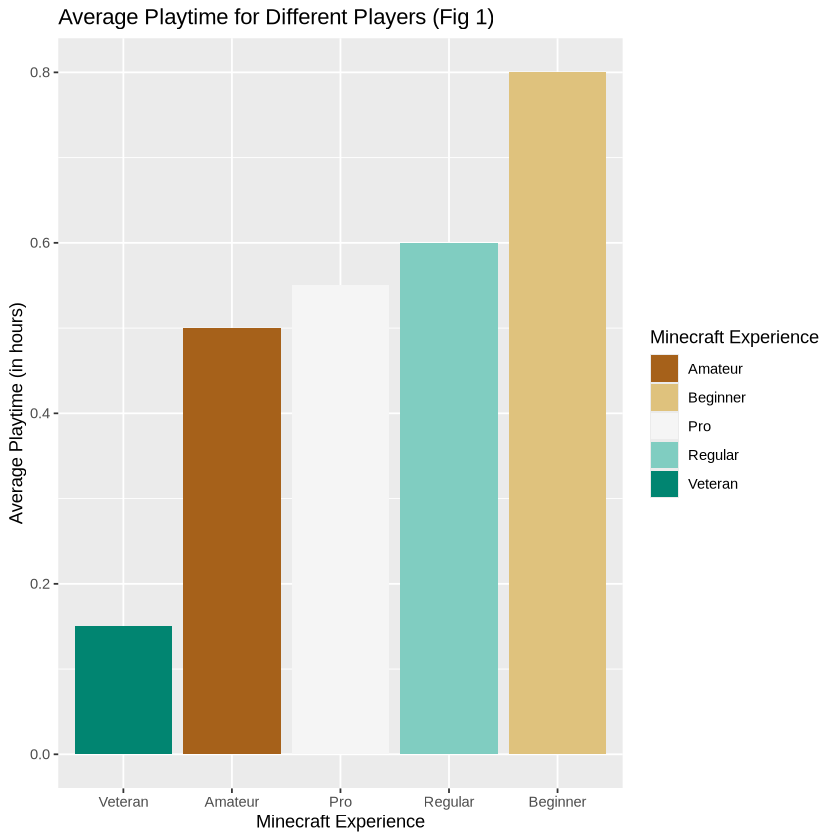

In [5]:
experience_bar<- avg_playtime |>
ggplot(aes(y = avg_play, x = fct_reorder(experience, avg_play), fill = experience))+
geom_bar(stat = "identity")+
labs(x = "Minecraft Experience", y = "Average Playtime (in hours)", fill = "Minecraft Experience") +
scale_fill_brewer(palette = "BrBG") +
ggtitle("Average Playtime for Different Players (Fig 1)")
experience_bar

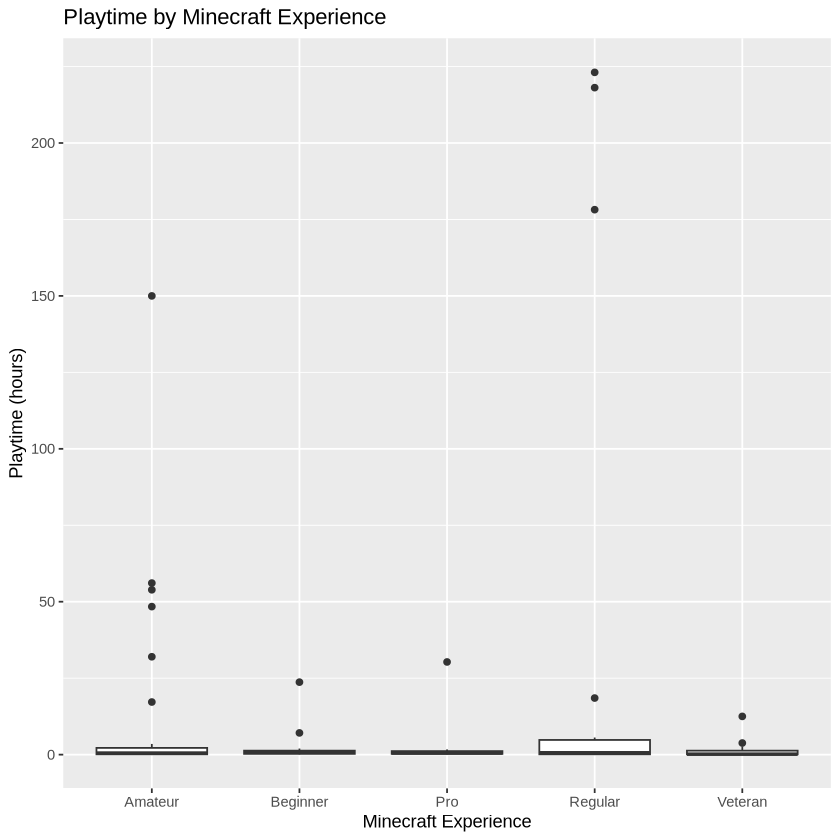

In [15]:
ggplot(players_select, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(x = "Minecraft Experience", y = "Playtime (hours)",
       title = "Playtime by Minecraft Experience")

Looking at the Average Playtime for Different Players, it seems out of all the players who played on the Minecraft server, the type of player with the highest average playtime was beginners.

A scatterplot with played hours and age was created with the colours being the different experiences was created to see any trends with age and played hours as both hours played and age are both quantitative variables.

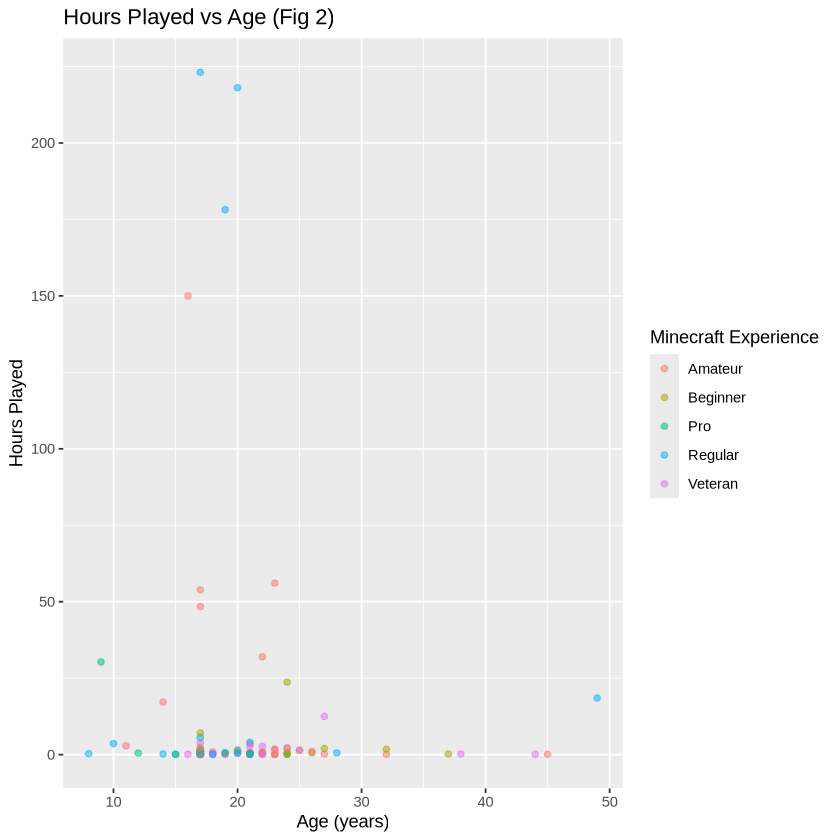

In [6]:
age_experience_plot<- players_select|>
ggplot(aes(x= Age, y = played_hours, colour = experience))+
    geom_point(alpha = 0.5)+
    labs(x= "Age (years)", y = "Hours Played", colour = "Minecraft Experience")+
    ggtitle("Hours Played vs Age (Fig 2)")
age_experience_plot

It seems like there there is no type of relationship between the number of hours played and the age of the player however, it seems there is a higher chance of a younger player (10 - 30) having more more than 10 hours of play time compared to older players (30+)

Seeing as there does not seem to be a linear relationship, in order to try to predict hours played with the player's age, K-NN regression is used as the response variable that is needed is a numerical value. Some weaknesses of K-NN regression is that it does not do well with any new observations/players that are much older than 50 and if there is a lot of players in the training data it will become slow so that is why the players that have zero playtime was removed.

The players.csv dataset was split into a training and testing set with a proportion of 75% to test the RMSE and RMSPE of our classifier and also use cross validiation using 5 folds to figure the best K to reduce the RMSPE with validation sets.

In [7]:
set.seed(13)
players_split<- initial_split(players_select, prop = 0.75, strata = played_hours)
players_training<- training(players_split)
players_testing<- testing(players_split)

In [8]:
players_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ Age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

In [9]:
players_vfold<- vfold_cv(players_training, v = 5, strata = played_hours)
players_workflow<- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_knn)
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
gridvals <- tibble(neighbors = seq(from = 1, to = 51, by = 10))
players_results<- players_workflow|>
                    tune_grid(resamples = players_vfold, grid = gridvals)|>
                   collect_metrics()
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,50.21989268,5,6.18770950,Preprocessor1_Model1
1,rsq,standard,0.04842959,5,0.03624251,Preprocessor1_Model1
11,rmse,standard,32.83523235,5,6.92343613,Preprocessor1_Model2
11,rsq,standard,0.10536275,5,0.06588698,Preprocessor1_Model2
21,rmse,standard,33.77264901,5,7.35780523,Preprocessor1_Model3
21,rsq,standard,0.11841787,5,0.07173534,Preprocessor1_Model3
31,rmse,standard,33.93912390,5,7.62406975,Preprocessor1_Model4
31,rsq,standard,0.10232075,5,0.07066966,Preprocessor1_Model4
41,rmse,standard,33.02044148,5,7.61032023,Preprocessor1_Model5


In [11]:
players_min <- players_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,32.29989,5,7.675151,Preprocessor1_Model6


In [12]:
k_min <- players_min |>
         pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,41.11982311
rsq,standard,0.04650671
mae,standard,17.90413165


The RMSPE being 41 is not good at all, meaning the classifier is doing a bad job at making accurate predictions and some of the reasons might be how many outliers/players with super high playtime could be influencing it.

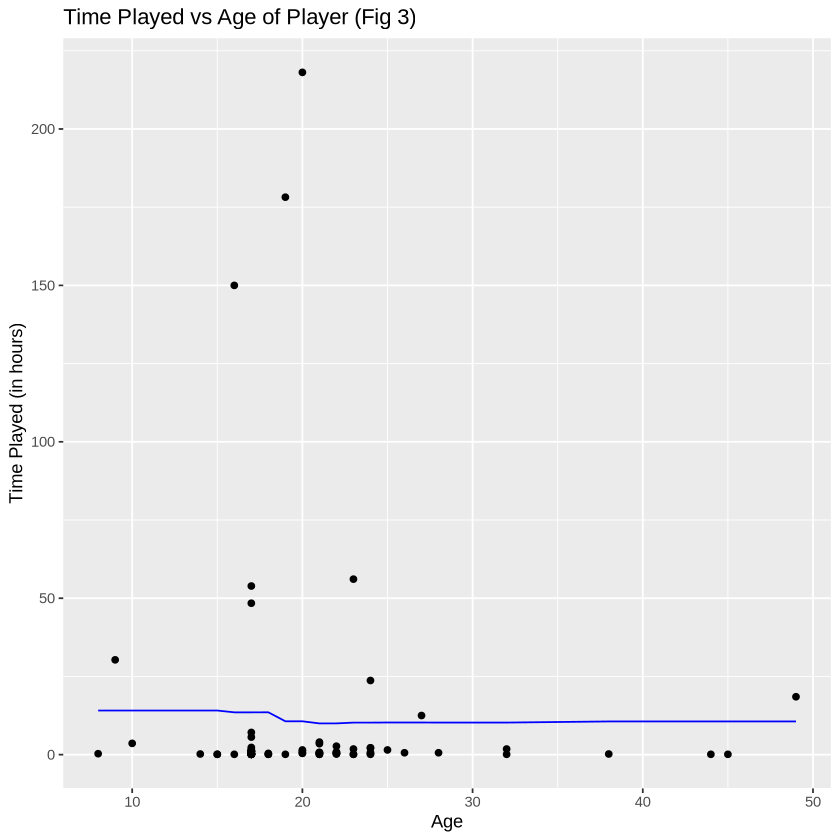

In [13]:
options(repr.plot.width = 7, repr.plot.height = 7)

# your code here
players_preds<- players_best_fit|>
    predict(players_training)|>
    bind_cols(players_training)

    players_plot<- ggplot(players_preds, aes(x = Age, y = played_hours))+
        geom_point()+
        geom_line(data = players_preds, mapping = aes(x = Age, y = .pred), color = "blue")+
        labs(x = "Age", y = "Time Played (in hours)")+
        ggtitle("Time Played vs Age of Player (Fig 3)")
players_plot

In [14]:
new_player<- tibble(Age = 20)
predict(players_best_fit, new_player)

.pred
<dbl>
10.66078


# Discussion
Answering the question of does amount of Minecraft experience and age predict the player's playtime, the answer is sort of inconclusive, we could say that beginners will have a higher playtime compared to other experiences.
Looking at the players data set, I wanted to wrangle the data to look at the experience, age and playtime as it is what the question is focused on. Since there is a lot of data, I wanted to make it smaller so I filtered out all the players that had 0 playtime on the server.
Since we have two variables we want to look at experience and age, I decided to do them seperately as a 3D visualization is not possible or nice to look at.

First, to figure out how experience is related to playtime, I calculated the average playtime for each experience and then plot them in a barplot to compare. Looking at the barplot, it shows that Beginners have the highest average playtime while veterans have the lowest. This bar plot could tell u that beginners are the type of experiences to have higher playtimes compared to the others to could be due to many outliers with really high playtimes as they are learning to play the game.